In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import statistics

In [85]:
df=pd.read_csv("/content/mainData.csv")

In [86]:
df.head()

,Participant,HR,respr,Time(sec),Label
0,2,118.00,12.127693,1644227583,0
1,2,113.50,12.127693,1644227584,0
2,2,93.00,12.127693,1644227585,0
3,2,93.25,12.127693,1644227586,0
4,2,86.40,12.127693,1644227587,0


In [87]:
 df.tail()

,Participant,HR,respr,Time(sec),Label
112511,35,65.45,11.546524,1646842243,0
112512,35,65.47,11.520924,1646842244,0
112513,35,65.50,11.495324,1646842245,0
112514,35,65.50,11.466879,1646842246,0
112515,35,65.50,11.441279,1646842247,0


In [88]:
df.shape


(112516, 5)

In [89]:
df.describe()


,Participant,HR,respr,Time(sec),Label
count,112516.000000,112472.000000,112516.000000,1.125160e+05,112516.000000
mean,18.475470,80.216177,12.465482,1.645692e+09,0.327198
std,9.871133,12.732206,2.030810,8.179419e+05,0.469192
min,2.000000,49.000000,5.204728,1.644228e+09,0.000000
25%,10.000000,71.330000,11.191843,1.644846e+09,0.000000
50%,18.000000,77.890000,12.743635,1.645461e+09,0.000000
75%,27.000000,87.020000,13.877519,1.646648e+09,1.000000
max,35.000000,146.780000,18.163532,1.646842e+09,1.000000


In [90]:
df.isnull().sum()

Participant     0
HR             44
respr           0
Time(sec)       0
Label           0
dtype: int64

In [91]:
df.fillna(df.mean(numeric_only=True).round(1), inplace=True)

In [92]:
df.isnull().sum()

Participant    0
HR             0
respr          0
Time(sec)      0
Label          0
dtype: int64

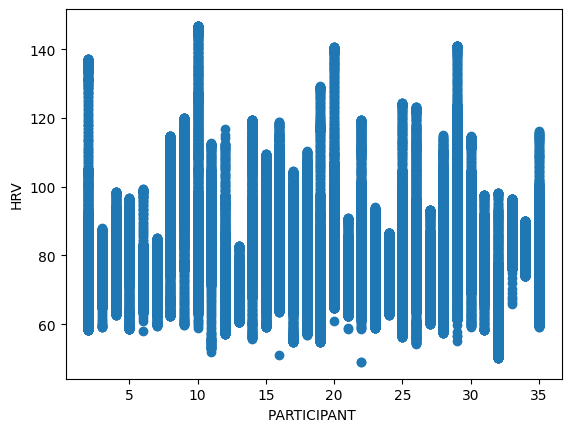

In [93]:
plt.scatter(df['Participant'], df['HR'])
plt.xlabel('PARTICIPANT ')
plt.ylabel('HRV')
plt.show()

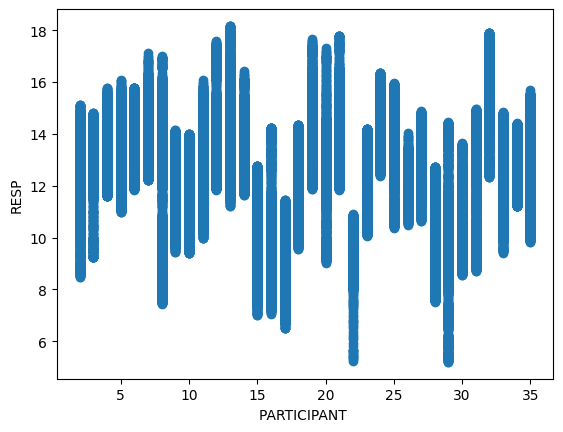

In [94]:
plt.scatter(df['Participant'], df['respr'])
plt.xlabel('PARTICIPANT ')
plt.ylabel('RESP')
plt.show()

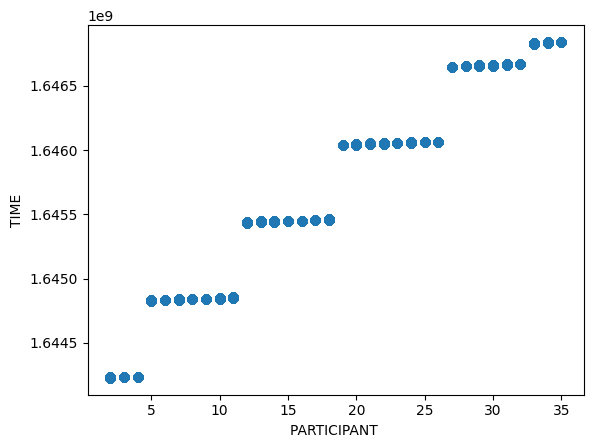

In [95]:
plt.scatter(df['Participant'], df['Time(sec)'])
plt.xlabel('PARTICIPANT ')
plt.ylabel('TIME')
plt.show()

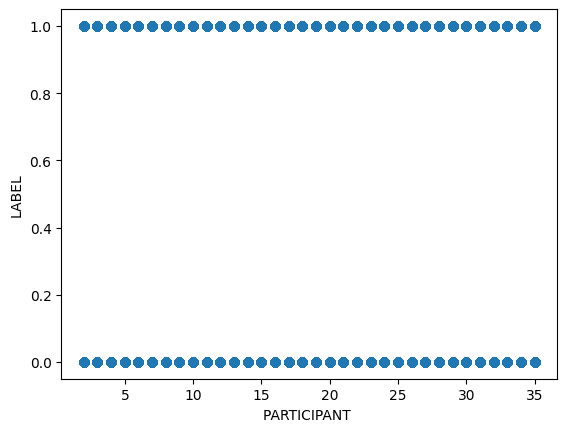

In [96]:
plt.scatter(df['Participant'], df['Label'])
plt.xlabel('PARTICIPANT ')
plt.ylabel('LABEL')
plt.show()

In [97]:
df.corr()

,Participant,HR,respr,Time(sec),Label
Participant,1.000000,-0.068477,-0.102881,0.979108,0.007071
HR,-0.068477,1.000000,-0.335988,-0.081053,0.139114
respr,-0.102881,-0.335988,1.000000,-0.090384,-0.048167
Time(sec),0.979108,-0.081053,-0.090384,1.000000,0.007893
Label,0.007071,0.139114,-0.048167,0.007893,1.000000


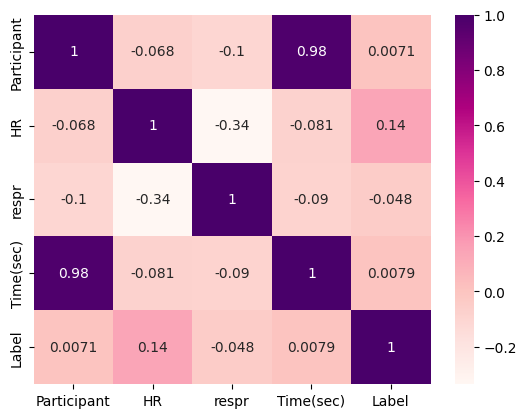

In [98]:
sns.heatmap(df.corr(), cmap="RdPu", annot=True)
plt.show()

In [99]:
train_data=['HR','respr','Time(sec)']
X=df[train_data]
y=df['Label']

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)*100))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)*100))

Accuracy of K-NN classifier on training set: 99.67
Accuracy of K-NN classifier on test set: 99.02


In [103]:
from sklearn.ensemble import RandomForestClassifier
RFS = RandomForestClassifier()
RFS.fit(X_train, y_train)
print('Accuracy of RFC classifier on training set: {:.2f}'
     .format(RFS.score(X_train, y_train)*100))
print('Accuracy of RFC classifier on test set: {:.2f}'
     .format(RFS.score(X_test, y_test)*100))

Accuracy of RFC classifier on training set: 99.99
Accuracy of RFC classifier on test set: 97.70
